## Ponderada Matemática Semana 05

### Item 01 – Distribuição Normal e Análise Exploratória

#### Item A

- Importando as bibliotecas necessárias

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import scipy.stats as stats

- Leitura dos dados 

In [136]:
df = pd.read_csv('Dados - Página1.csv')

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   DIA                 100 non-null    int64
 1   PREVISÃO DE VENDAS  100 non-null    int64
 2   VENDAS REAIS        100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


- Previsão de Vendas

In [138]:
previsao_de_vendas = df['PREVISÃO DE VENDAS']

media_pv = round(previsao_de_vendas.mean(), 2)
std_pv = round(previsao_de_vendas.std(), 2)

print(f'A média da previsão de vendas é: {media_pv}')
print(f'O desvio-padrão da previsão de vendas é: {std_pv}')

A média da previsão de vendas é: 134.77
O desvio-padrão da previsão de vendas é: 4.12


- Vendas Reais

In [139]:
vendas_reais = df['VENDAS REAIS']

media_vr = round(vendas_reais.mean(), 2)
std_vr = round(vendas_reais.std(), 2)

print(f'A média da previsão de vendas é: {media_vr}')
print(f'O desvio-padrão da previsão de vendas é: {std_vr}')

A média da previsão de vendas é: 135.28
O desvio-padrão da previsão de vendas é: 4.21


#### Item B

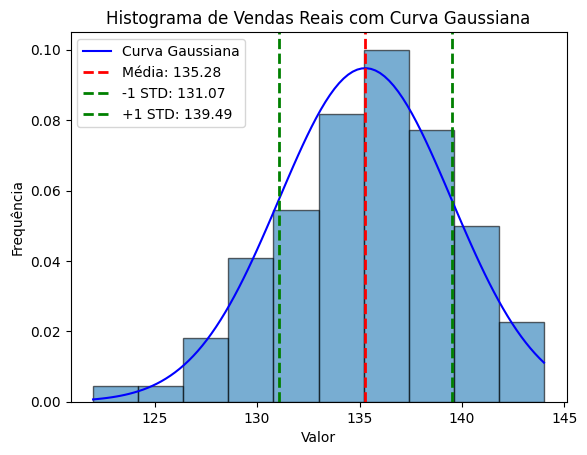

In [140]:
plt.hist(vendas_reais, bins=10, density=True, edgecolor='black', alpha=0.6)

x = np.linspace(min(vendas_reais), max(vendas_reais), 100)

plt.plot(x, norm.pdf(x, media_vr, std_vr), color='blue', label='Curva Gaussiana')

plt.axvline(media_vr, color='r', linestyle='dashed', linewidth=2, label=f'Média: {media_vr:.2f}')
plt.axvline(media_vr - std_vr, color='g', linestyle='dashed', linewidth=2, label=f'-1 STD: {media_vr - std_vr:.2f}')
plt.axvline(media_vr + std_vr, color='g', linestyle='dashed', linewidth=2, label=f'+1 STD: {media_vr + std_vr:.2f}')

plt.title('Histograma de Vendas Reais com Curva Gaussiana')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.legend()

plt.show()

#### Item C

In [141]:
z = (130 - media_pv) / std_pv
probabilidade_130 = round(stats.norm.cdf(z) * 100, 1) 

print(f'A probabilidade de prever valores menores que 130 é de {probabilidade_130}%')

A probabilidade de prever valores menores que 130 é de 12.3%


### Item 02 - Teste de Hipótese Para Validação do Modelo

#### Parte A

&ensp;H0: 

Literal: o modelo preditivo é eficiente e fornece estimativas precisas. Logo a média dos _outputs_ não são significativamente diferentes.

Matemática: media_pv = media_vr

&ensp;HA: 

Literal: o modelo preditivo não é eficiente em fornecer estimativas precisas. Logo a média dos _outputs_ são significativamente diferentes.

Matemática: media_pv != media_vr

#### Parte B

&ensp;Considerando as hipoteses, define-se que deve ser efetuado um teste bicaudal, pois busca-se descobrir se as médias são significativamente diferentes, logo pode ser maior ou menor.

&ensp;Sendo o nivel de significância 5% (alpha = 0.05), logo 2,5% para cada lado, pode-se usar a tabela Z para descobrir a partir do _alpha_ o valor crítico.

In [142]:
# Nível de significância
alpha = 0.05

# Valor crítico para teste bilateral (tabela Z ou scipy)
z_critico = stats.norm.ppf(1 - alpha / 2)

z_critico_round = round(z_critico, 2)

print(f'O valor critico pode ser ±{z_critico_round}')

O valor critico pode ser ±1.96


#### Parte C

In [143]:
n = len(previsao_de_vendas) #Tamanho da amostra

z_teste = round((media_vr - media_pv) / (std_vr / np.sqrt(n)), 2)

print(f"Valor do Z-score: {z_teste}, aproximadamente.")

Valor do Z-score: 1.21, aproximadamente.


#### Parte D

&ensp;Como o valor do Z de teste (z_teste) foi de 1.19 e o valor crítico é o intervalo entre +1,96 e -1,96, pode-se afirmar que o Z de teste está contido dentro do intervalo crítico, o que significa que a hipótese nula (H0) não pode ser rejeitada. Pois, não há evidência suficiente para afirmar que a média das previsões de vendas é diferente da média das vendas reais.